# 16장. 이미지 인식의 꽃, 컨볼루션 신경망(CNN)


#### 참고자료 
* http://neuralnetworksanddeeplearning.com/chap1.html
* https://cs231n.github.io/convolutional-networks/

* MNIST 데이터셋은 미국 국립표준기술원(NIST)이 고등학생과 인구조사국 직원 등이 쓴 손글씨를 이용해 만든 데이터로 구성되어있음. 
* 7만개의 글자 이미지에 각각 0~9까지 이름표를 붙인 데이터셋

### 1. 이미지를 인식하는 원리
* 케라스 MNIST 데이터는 총 7만 개의 이미지 중 6만 개를 학습용으로, 1만 개를 테스트용으로 미리 구분해 놓고 있다. 

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print('학습셋 이미지 수: %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수: %d 개' % (X_test.shape[0]))

(60000, 28, 28)
학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


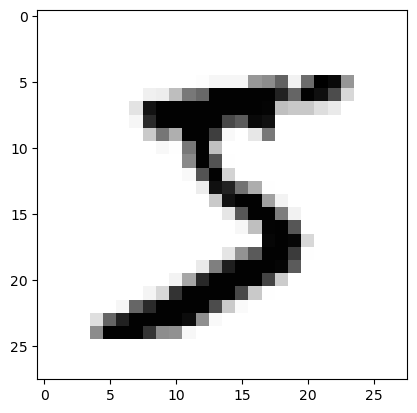

In [7]:
# 이 이미지는 (가로 28) * (세로 28) = 784 개의 픽셀로 이루어져있음.
# 각 픽셀은 밝기 정도에 따라 0부터 255까지 등급을 매김.
# 흰색 배경이 0이라면 글씨가 들어간 곳은 1~255의 숫자 중 한로 채워져 긴 행렬로 이루어진 하나의 집합으로 변환
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [8]:
# 이미지를 인식하는 원리
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

* 앞의 여러 예제와 마찬가지로 속성을 담은 데이터를 딥러닝에 집어넣고 클래스를 예측하는 문제로 전환시키는 것. 
* 28*28 = 784개의 속성을 이용해 0~9의 클래스 열개 중 하나를 맞히는 문제가 됨.

In [11]:
# 주어진 가로28 세로28의 2차원 배열을 784개의 1차원 배열로 바꿔준다. 이를 위해 reshape() 함수 사용
# reshape(총 샘플 수, 1차원 속성의 개수) 형식으로 지정. 
# 총 샘플 수는 앞서 사용한 X_train.shape[0] 이용. 1차원 속성의 개수는 784
X_train = X_train.reshape(X_train.shape[0], 784)
# 현재 주어진 데이터 값은 0부터 255까지의 정수. 정규화를 위해 255로 나눠주려면 먼저 이값을 실수형으로 바꿔야함.
X_train = X_train.astype('float64')     
X_train = X_train / 255         # 데이터 정규화

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 실제 이 숫자의 레이블이 어떤지 출력
print('class: %d' % (y_train[0]))

# 12장에서 아이리스 품종을 예측할 때 딥러닝의 분류문제를 해결하려면 원-핫 인코딩 방식을 적용
# 즉 0~9의 정수형 값을 갖는 현재 형태에서 0또는 2로만 이루어진 벡터로 값을 수정
#from tensorflow.keras.utils import to_categorical
#  # [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]로 바꿔줘야함. 이를 가능하게 하는 함수 np_utils.to_categorical()함수  
y_train = to_categorical(y_train, 10)  #to_categorical(클래스, 클래스의 갯수) 형식
y_test = to_categorical(y_test, 10)

print(y_train[0])

class: 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 2. 딥러닝 기본 프레임 만들기

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#차원 변환 후, 테스트셋과 학습셋으로 나누어줍니다. 
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)

# 모델 구조를 설정합니다. 
# 입력값(input_dim)이 784개, 은닉층이 512개, 출력이 10개인 모델
# 활성화 함수로 은닉층에서는 relu, 출력층에서는 softmax를 사용
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()
# y = wx + b

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
(784*512) + 512

401920

In [19]:
# 모델 실행 환경을 설정합니다. 
# 오차함수로 categorical_crossentropy, 최적화 함수로 adam을 사용
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#모델 최적화를 위한 설정구간입니다. 
MODEL_DIR = '../model1/'    
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)     # MODEL_DIR 디렉토리가 없으면 만들어라


modelpath = '../model1/MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)        # 성능향상이 10번 이상 일어나지 않으면 자동으로 학습 중단

#모델을 실행합니다. 
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 200, verbose = 0., callbacks = [early_stopping_callback, checkpointer])

# 테스트 정확도를 출력합니다. 
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18528, saving model to ../model1\MNIST_MLP.hdf5


c:\Users\lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18528 to 0.13632, saving model to ../model1\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13632 to 0.11243, saving model to ../model1\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11243 to 0.10306, saving model to ../model1\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10306 to 0.09073, saving model to ../model1\MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09073 to 0.08722, saving model to ../model1\MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08722 to 0.08492, saving model to ../model1\MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08492 to 0.08304, saving model to ../model1\MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.08304

Epoch 10: val_loss improved from 0.08304 to 0.08235, saving model to ../model1\MNIST_MLP.hdf5

Epoch 11: val_loss improved from 0.08235 to 0.07959, saving model to ../model1\MNIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.07959

Epoch 13: val_loss did not improve from 0.07959

Epoch

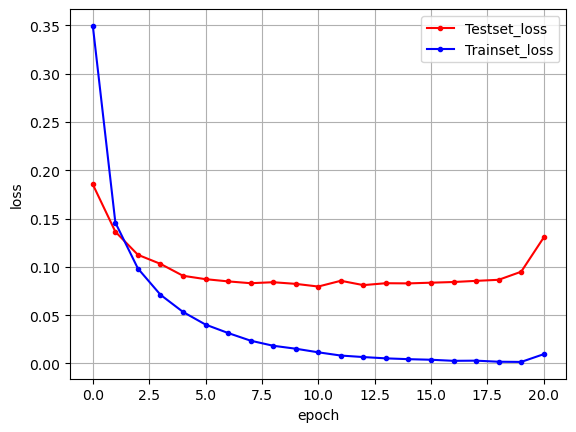

In [21]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

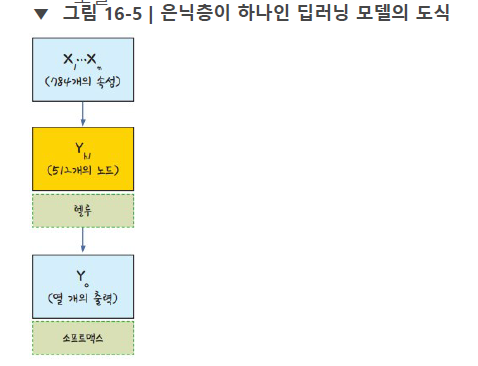

### 3. 컨볼루션 신경망(Convolutional Neural Networks)
* 고양이가 사물을 볼 때 뇌 전체가 아닌 일부만 활성화된다는 사실을 발견
* 컨볼루션 신경망은 입력된 이미지에서 다시 한 번 특징을 추출하기 위해 커널을 도입하는 기법 
* 주황색 부분이 커널
* 커널의 각 칸에는 가중치가 들어있음.
* 커널의 샘플 가중치를 x1, x0라 하겠음.
* 예시  $(1 \times 1) + (0 \times 0) + (0 \times 0) + (1 \times 1) = 2 $  <br>
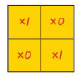

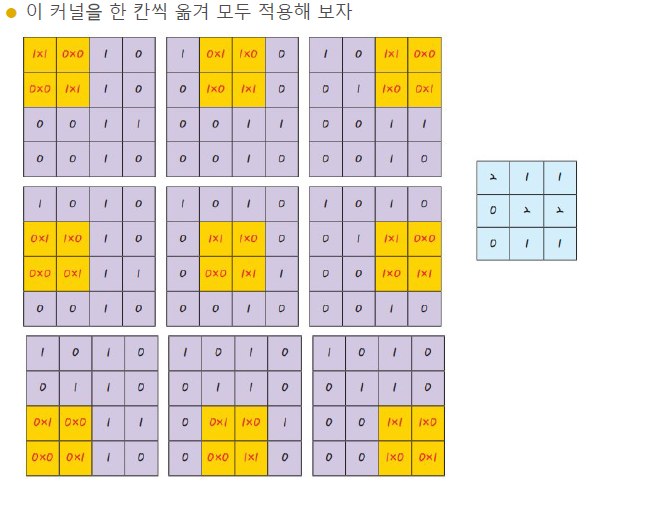

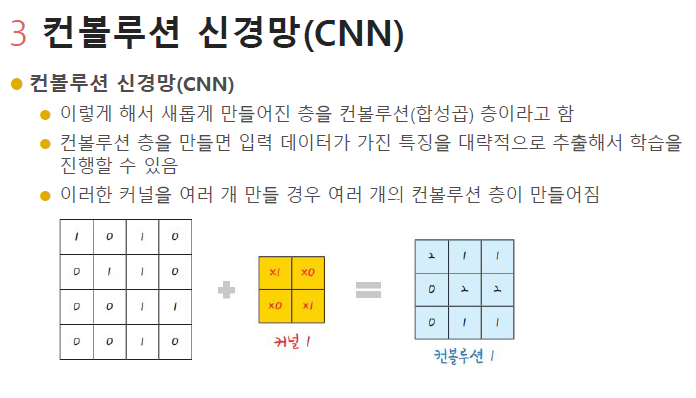

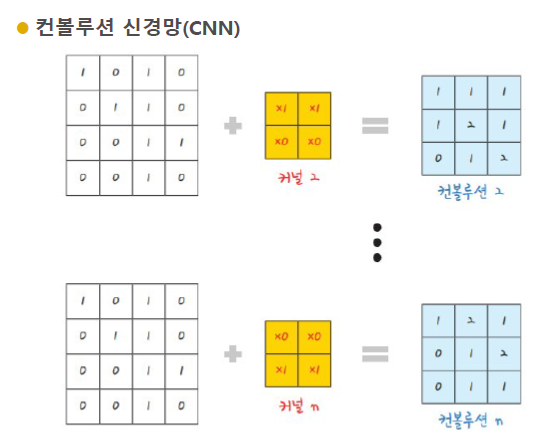

 model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28, 28, 1), activation = 'relu'))  에 입력된 네 가지 인자는 다음과 같음
* 첫번째 인자: 커널을 몇 개 적용할지 결정
    * 여기서는 32개의 커널을 적용
* kernel_size : 커널의 크기를 정함
    * kernel_size = (행, 열) 형식으로 정하며, 여기서는 3 \times 3크기의 커널을 사용하게끔 정함
* input_shape : Dense 층과 마찬가지로 맨 처음 층에는 이벽되는 값을 알려주어야 함
    * input_shape = (행, 열, 색상 또는 흑백) 형식으로 정함
    * 만약 입력 이미지가 색상이면 3, 흑백이면 1을 지정. 여기서는 28 \times 28 크기의 흑백 이미지를 사용하도록 정함
* activation : 사용할 활성화 함수를 정의  


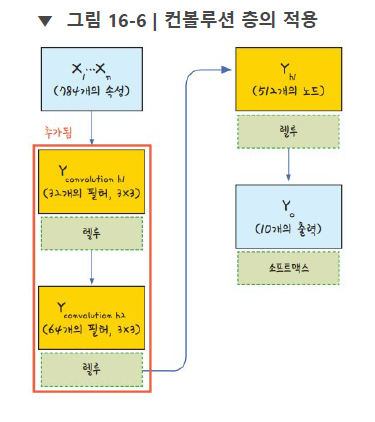

### 4. 맥스 풀링, 드랍아웃, 플래튼
* 맥스 풀링
    * 앞서 구현한 컨볼루션 층을 통해 이미지 특징을 도출
    * 그 결과가 여전히 크고 복잡하면 이를 다시 한 번 축소해야함.
    * 이 과정을 **풀링(pooling)** 또는 **서브 샘플링(sub sampling)** 이라고 함
    * 이러한 풀링 기법에는 정해진 구역안에서 최댓값을 뽑아내는 **맥스 풀링(max pooling)** 과 평균값을 뽑아내는 평균 풀링(average pooling) 등이 있다.


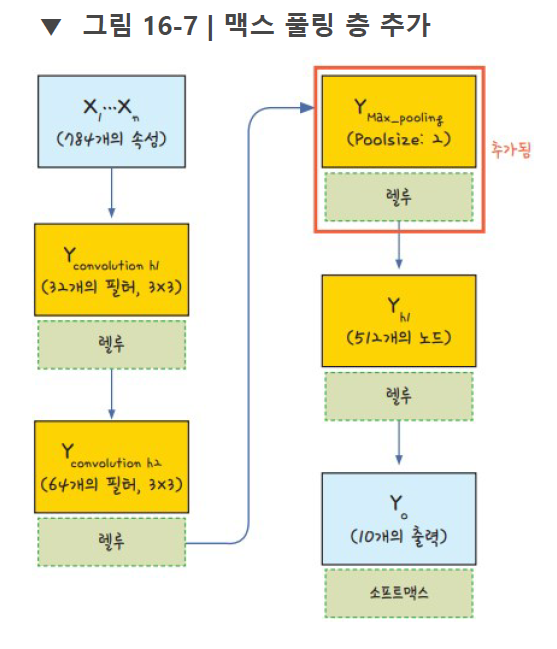

* 드롭아웃
    * 노드가 많아지거나 층이 많아진다고 해서 학습이 무조건 좋아지는 것이 아니라는 점을 과적합 의미를 공부하며 배웠음
    * 딥러닝에서 학습을 진행할 때 가장 중요한 것은 과적합을 얼마나 효과적으로 피해가는지에 달려있다
    * 이러한 과정을 도와주는 기법 중 가장 간단하지만 효과가 큰 기법이 **드롭아웃(drop out)** 기법
    * 드롭아웃은 은닉층에 배치된 노드 중 일부를 임의로 꺼 주는 것
    * 이렇게 랜덤하기 노드를 꺼 주면 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지할 수 있음.
    * 케라스는 이러한 드롭아웃을 손쉽게 적용하도록 도와줌

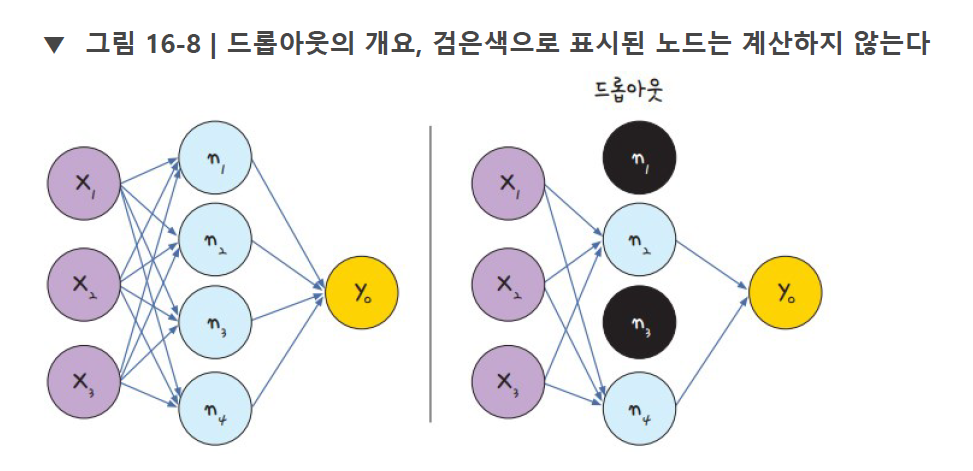

* 플래튼
    * 이러한 과정을 지나 다시 앞에서 Dense() 함수를 이용해 만들엇던 기본층에 연결
    * 이 때 주의할 점은 컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열인 채로 다룬다는 것
    * 이를 1차원 배열로 바꿔주어야 활성화 함수가 있는 층에서 사용할 수 있음.
    * Flatten() 함수를 사용해 2차원 배열을 1차원으로 바꿔줌 

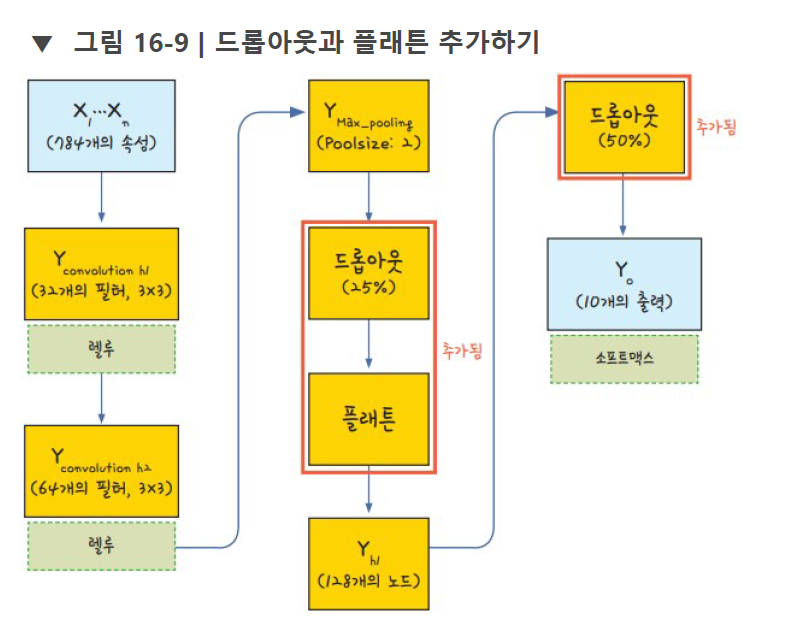

### 5. 컨볼루션 신경망 실행하기

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os

#데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') /255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#컨볼루션 신경망

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))      # 맥스 풀링은 MaxPooling2D() 함수를 사용. pool_size로 풀링 창의 크기 결정. 가로2 세로2 풀링창을 통해 맥스풀링 진행
model.add(Dropout(0.25))       # 드롭아웃 - 25%의 노드를 랜덤하게 꺼준다. => 과적합 방지
model.add(Flatten())        # 플래튼 - Flatten()함수를 사용해 2차원 배열을 1차원으로 바꿔줌
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

# 모델의 실행 옵션을 설정
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

#모델 최적화를 위한 설정 구간
MODEL_DIR = '../model/'    
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)     # MODEL_DIR 디렉토리가 없으면 만들어라

modelpath = '../model/MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)        # 성능향상이 10번 이상 일어나지 않으면 자동으로 학습 중단

#모델을 실행합니다. 
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 200, verbose = 0., callbacks = [early_stopping_callback, checkpointer])

# 테스트 정확도를 출력합니다. 
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08398, saving model to ../model\MNIST_CNN.hdf5


c:\Users\lenovo\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.08398 to 0.06002, saving model to ../model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06002 to 0.05023, saving model to ../model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05023 to 0.04413, saving model to ../model\MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04413 to 0.04253, saving model to ../model\MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04253

Epoch 7: val_loss improved from 0.04253 to 0.04116, saving model to ../model\MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.04116 to 0.04039, saving model to ../model\MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.04039

Epoch 10: val_loss did not improve from 0.04039

Epoch 11: val_loss did not improve from 0.04039

Epoch 12: val_loss did not improve from 0.04039

Epoch 13: val_loss improved from 0.04039 to 0.04001, saving model to ../model\MNIST_CNN.hdf5

Epoch 14: val_loss did not improve from 0.04001

Epoch 15: val_loss did not improve from 0.04001

Epoch 

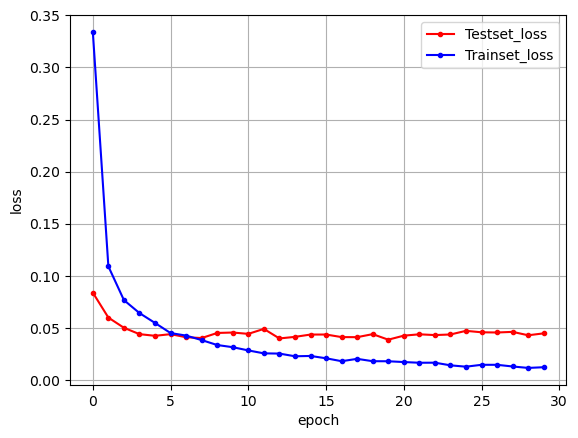

In [29]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##### 못 맞춘 이미지는?

313/313 [==============================] - 3s 9ms/step


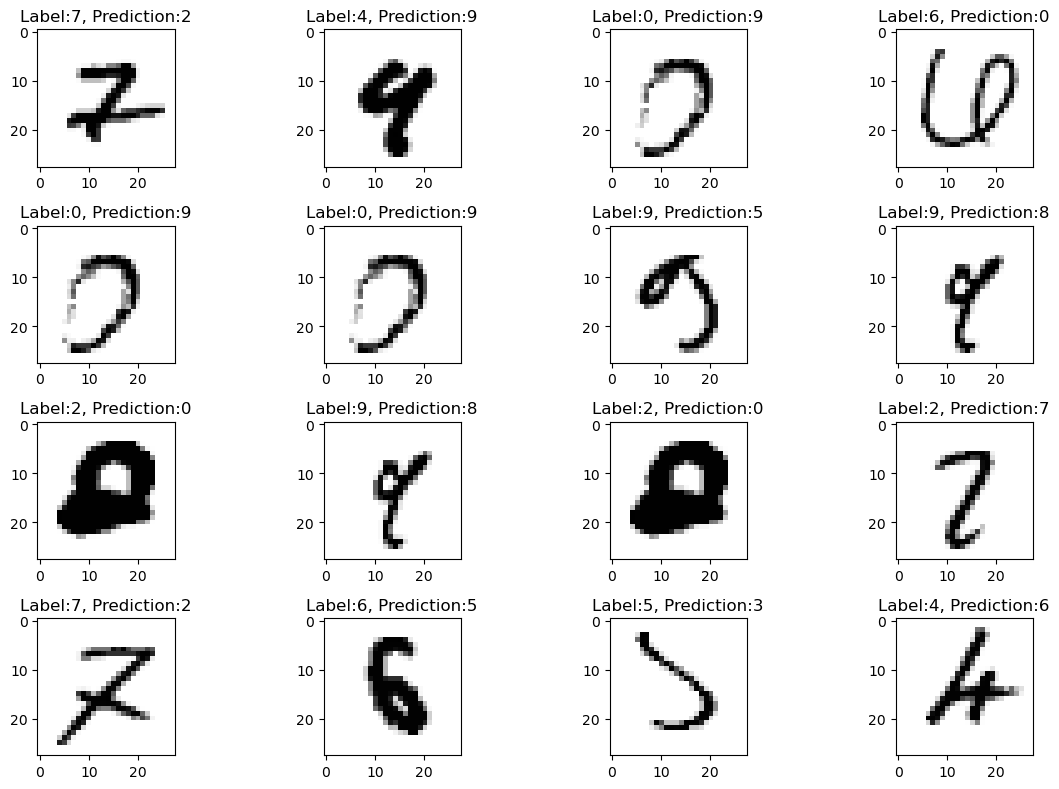

In [30]:
import random
import numpy as np
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)
wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
samples = random.choices(population=wrong_result, k=16)
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)
plt.tight_layout()
plt.show()